| **Inicio** | **atrás 5** | **Siguiente 7** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./5_Analisis_de_Datos_Avanzado.ipynb)| [⏩](./7_Temas_Avanzados_y_Herramientas_Específicas.ipynb)|

# **5. Machine Learning para Análisis de Datos**

## **Introducción a Machine Learning**

### **Aprendizaje supervisado y no supervisado**

**Aprendizaje Supervisado:**

En el aprendizaje supervisado, el modelo se entrena utilizando un conjunto de datos etiquetado, donde cada ejemplo en el conjunto de datos tiene una etiqueta asociada. El objetivo del modelo es aprender la relación entre las características (variables independientes) y las etiquetas (variable dependiente) para realizar predicciones en nuevos datos.

**Ejemplo de Regresión Lineal:**

Vamos a utilizar un ejemplo simple de regresión lineal en Python con el conjunto de datos de diabetes de Scikit-Learn:

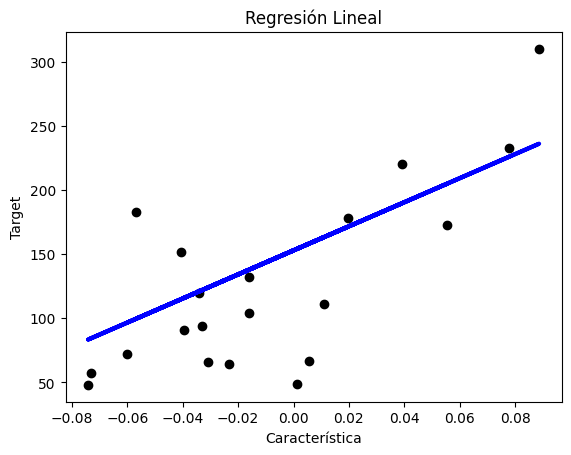

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el conjunto de datos de diabetes
diabetes = datasets.load_diabetes()
X = diabetes.data[:, np.newaxis, 2]  # Utilizar solo una característica para simplificar
y = diabetes.target

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]

# Crear el modelo de regresión lineal
regr = linear_model.LinearRegression()

# Entrenar el modelo
regr.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = regr.predict(X_test)

# Visualizar los resultados
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Característica')
plt.ylabel('Target')
plt.title('Regresión Lineal')
plt.show()

En este ejemplo, se utiliza una característica del conjunto de datos de diabetes para predecir el target (respuesta). El modelo de regresión lineal aprende la relación entre la característica y el target.

**Aprendizaje No Supervisado:**

En el aprendizaje no supervisado, el modelo se entrena en un conjunto de datos sin etiquetas. El objetivo principal es explorar la estructura y patrones internos de los datos.

**Ejemplo de K-Means:**

Utilizaremos el algoritmo de clustering K-Means para agrupar datos. En este ejemplo, utilizaremos el conjunto de datos Iris:

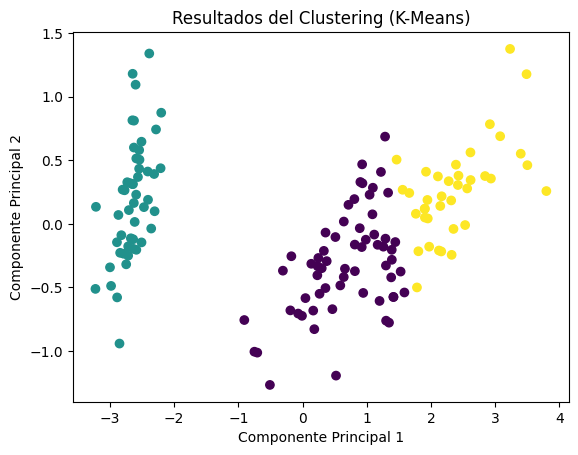

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Aplicar el algoritmo K-Means para agrupar los datos en 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

# Reducir la dimensionalidad para visualizar en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizar los resultados del clustering
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Resultados del Clustering (K-Means)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

En este ejemplo, aplicamos K-Means para agrupar los datos Iris en tres clusters basándonos en las características. La visualización en 2D utiliza PCA para reducir la dimensionalidad y permite observar cómo los datos se agrupan en función de las características.

En resumen, el aprendizaje supervisado se utiliza para predecir una etiqueta conocida, mientras que el aprendizaje no supervisado se utiliza para explorar patrones y estructuras en los datos sin etiquetas.

### **Algoritmos básicos (regresión, clasificación, clustering)**

En Machine Learning, los algoritmos básicos se dividen comúnmente en tres categorías principales: regresión, clasificación y clustering. Aquí proporcionaré una breve explicación de cada categoría con ejemplos y gráficos personalizados en código Python.

**1. Regresión**

**Definición:** La regresión se utiliza para predecir valores continuos. En otras palabras, se utiliza cuando la variable objetivo es una cantidad numérica.

**Ejemplo:** Vamos a utilizar el conjunto de datos de Boston para predecir el precio medio de las viviendas (`MEDV`) en función de varias características.

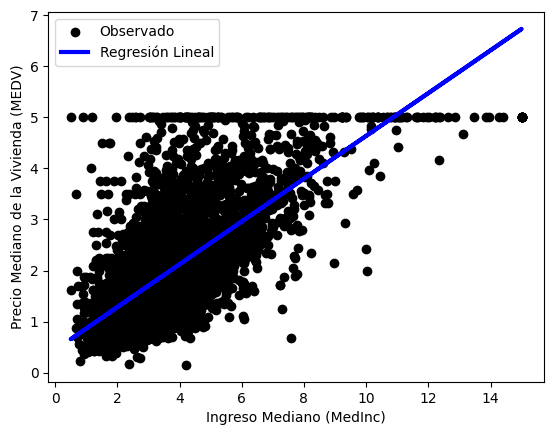

Error Cuadrático Medio: 0.7091157771765549


In [5]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California housing dataset
housing = fetch_california_housing()

# Create a DataFrame from the dataset
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['MEDV'] = housing.target

# Select features and target variable
X = df[['MedInc']]  # Median income in the block
y = df['MEDV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the results
plt.scatter(X_test, y_test, color='black', label='Observado')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regresión Lineal')
plt.xlabel('Ingreso Mediano (MedInc)')
plt.ylabel('Precio Mediano de la Vivienda (MEDV)')
plt.legend()
plt.show()

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')

**2. Clasificación**

**Definición:** La clasificación se utiliza para predecir la pertenencia a una categoría o clase. Es aplicable cuando la variable objetivo es categórica.

**Ejemplo:** Utilizaremos el conjunto de datos Iris para clasificar las especies de flores en función de sus características.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = iris.target

# Seleccionar características y variable objetivo
X = df.drop('Species', axis=1)
y = df['Species']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de clasificación K-Nearest Neighbors (KNN)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Precisión del modelo: 1.0
Matriz de Confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**3. Clustering**

**Definición:** El clustering se utiliza para agrupar datos similares en conjuntos. No requiere etiquetas previas y busca descubrir patrones y relaciones.

**Ejemplo:** Utilizaremos K-Means para agrupar datos en el conjunto de datos Iris.

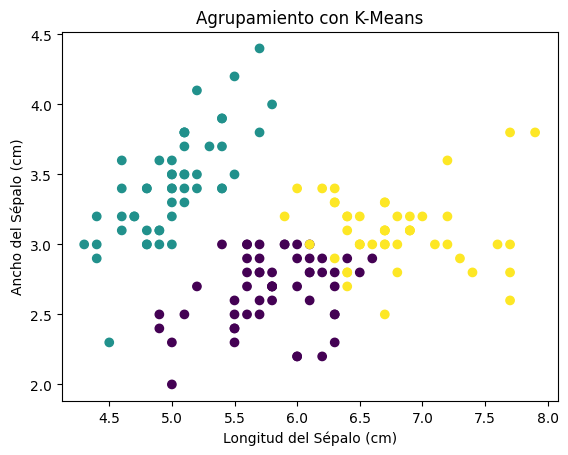

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Escalar las características para mejorar la efectividad de K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Aplicar K-Means para agrupar los datos en 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar los resultados
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Ancho del Sépalo (cm)')
plt.title('Agrupamiento con K-Means')
plt.show()

Estos son solo ejemplos básicos para cada categoría. En un escenario real, es importante explorar y entender los datos antes de elegir y ajustar un modelo específico. Además, ajustar los parámetros del modelo y evaluar su rendimiento es una parte crucial del proceso de Machine Learning.

## **Implementación de Modelos de Machine Learning en Python**

### **Uso de bibliotecas como Scikit-Learn**

¡Claro! Aquí te proporcionaré un ejemplo detallado de implementación de un modelo de machine learning en Python. Utilizaremos un conjunto de datos ficticio y construiremos un modelo de regresión lineal simple. En este ejemplo, usaremos la biblioteca scikit-learn.

Primero, asegúrate de tener scikit-learn instalado. Puedes instalarlo usando:

```bash
pip install scikit-learn
```

Ahora, sigue los pasos a continuación para implementar el modelo:

**Paso 1: Importar bibliotecas y cargar datos**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Crear datos ficticios
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Paso 2: Visualizar los datos**

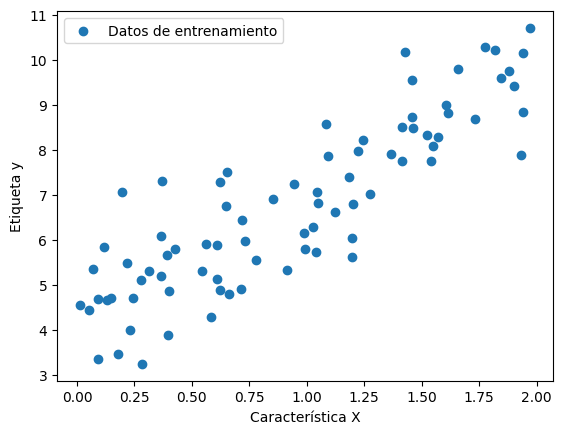

In [7]:
plt.scatter(X_train, y_train, label='Datos de entrenamiento')
plt.xlabel('Característica X')
plt.ylabel('Etiqueta y')
plt.legend()
plt.show()

**Paso 3: Crear y entrenar el modelo de regresión lineal**

In [8]:
# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

**Paso 4: Hacer predicciones y evaluar el modelo**

In [9]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio en el conjunto de prueba: {mse}')

Error cuadrático medio en el conjunto de prueba: 0.6536995137170021


**Paso 5: Visualizar las predicciones**

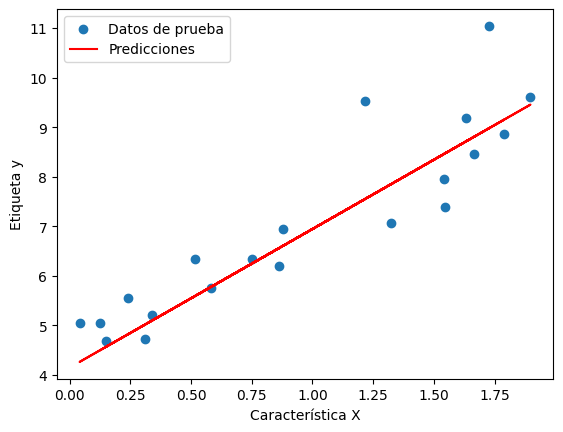

In [10]:
# Visualizar las predicciones
plt.scatter(X_test, y_test, label='Datos de prueba')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Característica X')
plt.ylabel('Etiqueta y')
plt.legend()
plt.show()

Este es un ejemplo simple, pero puedes adaptar estos pasos básicos a modelos más complejos y conjuntos de datos más grandes. Recuerda que la elección del modelo y los pasos específicos pueden variar según el problema que estás abordando.

### **Evaluación de modelos y ajuste de hiperparámetros**

La evaluación de modelos y el ajuste de hiperparámetros son pasos esenciales en el desarrollo de modelos de machine learning. La evaluación de modelos implica medir su rendimiento utilizando métricas específicas, mientras que el ajuste de hiperparámetros implica encontrar la combinación óptima de configuraciones que maximice o minimice la métrica de evaluación. En este ejemplo, utilizaremos la validación cruzada y la búsqueda de hiperparámetros para ilustrar estos conceptos.

Primero, asegúrate de tener instalada la biblioteca scikit-learn:

```bash
pip install scikit-learn
```

Ahora, sigamos con el ejemplo:

Puntuaciones de la validación cruzada: [-2970.68019768 -2604.17296818 -4389.71899058 -2350.41170186
 -2185.56208109]


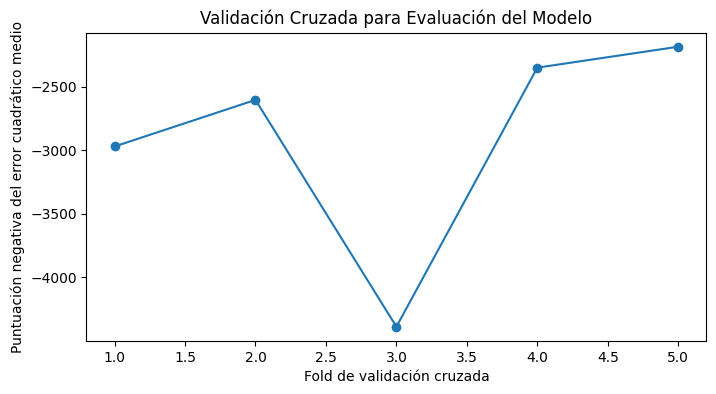

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Error cuadrático medio en el conjunto de prueba: 2524.7046578364057


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Crear un conjunto de datos sintético
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 1: Crear un modelo (Random Forest Regressor en este caso)
model = RandomForestRegressor()

# Paso 2: Realizar la validación cruzada para evaluar el rendimiento del modelo
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Puntuaciones de la validación cruzada: {cv_scores}')

# Visualizar las puntuaciones
plt.figure(figsize=(8, 4))
plt.plot(range(1, 6), cv_scores, marker='o')
plt.xlabel('Fold de validación cruzada')
plt.ylabel('Puntuación negativa del error cuadrático medio')
plt.title('Validación Cruzada para Evaluación del Modelo')
plt.show()

# Paso 3: Ajuste de hiperparámetros usando GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
best_params = grid_search.best_params_
print(f'Mejores hiperparámetros: {best_params}')

# Mejor modelo después del ajuste de hiperparámetros
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
test_predictions = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
print(f'Error cuadrático medio en el conjunto de prueba: {test_mse}')

Este ejemplo utiliza un RandomForestRegressor y la métrica negativa del error cuadrático medio para la evaluación. La validación cruzada se realiza para evaluar el rendimiento del modelo, y luego se realiza una búsqueda de cuadrícula para ajustar los hiperparámetros. Finalmente, el modelo ajustado se evalúa en el conjunto de prueba.

Este es un enfoque común para la evaluación de modelos y ajuste de hiperparámetros, pero ten en cuenta que la elección de métricas y modelos dependerá del problema específico que estás abordando.

| **Inicio** | **atrás 5** | **Siguiente 7** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./5_Analisis_de_Datos_Avanzado.ipynb)| [⏩](./7_Temas_Avanzados_y_Herramientas_Específicas.ipynb)|